In [1]:
#Code contains DL Tracking visualization for img3200
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [15]:
GT = pd.read_csv('GTlmg3200.csv')
GT

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height,center_x,center_y
0,Ball,460,277,12,12,left003200.png,1280,720,466.0,283.0
1,Ball,458,282,11,12,left003201.png,1280,720,463.5,288.0
2,Ball,456,287,12,12,left003202.png,1280,720,462.0,293.0
3,Ball,456,293,10,11,left003203.png,1280,720,461.0,298.5
4,Ball,454,300,11,9,left003204.png,1280,720,459.5,304.5
...,...,...,...,...,...,...,...,...,...,...
90,Ball,449,238,11,10,left003296.png,1280,720,454.5,243.0
91,Ball,452,239,12,9,left003297.png,1280,720,458.0,243.5
92,Ball,454,241,14,10,left003298.png,1280,720,461.0,246.0
93,Ball,458,242,12,12,left003299.png,1280,720,464.0,248.0


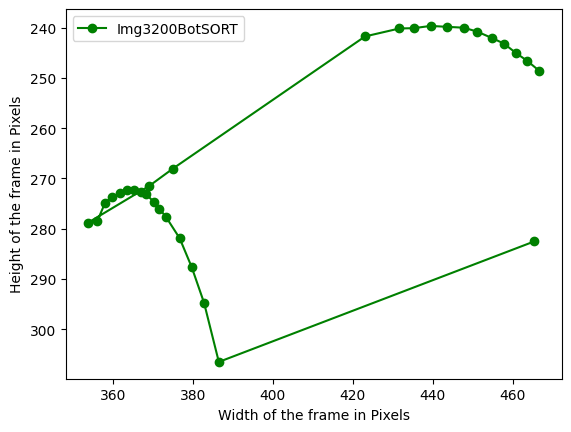

In [16]:
#BOTSORT
df = pd.read_csv('img3200_botsort.csv')
df['center_x'] = df['x'] + df['width']/2
df['center_y'] = df['y'] + df['height']/2
#plot the center of the bounding box
from matplotlib import markers
plt.plot(df['center_x'], df['center_y'], marker='o', color='green', label='Img3200BotSORT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [34]:
df

,Frame_ID,ID,x,y,width,height,center_x,center_y
0,1,1,461.000,278.000,9.00000,9.00000,465.500000,282.500000
1,52,1,381.027,300.991,10.99930,10.99920,386.526650,306.490600
2,55,40,377.425,288.818,10.79970,11.79970,382.824850,294.717850
3,57,41,374.226,282.602,10.99960,9.99994,379.725800,287.601970
4,59,42,371.227,276.386,10.99960,11.00020,376.726800,281.886100
5,61,43,367.428,272.179,11.79960,11.00030,373.327800,277.679150
6,62,43,365.638,270.470,11.94990,11.00060,371.612950,275.970300
7,63,43,364.224,269.126,12.00350,11.00050,370.225750,274.626250
8,64,43,362.328,267.260,12.01660,11.75070,368.336300,273.135350
9,65,43,361.029,266.664,12.01790,11.99460,367.037950,272.661300


In [21]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

In [22]:
#AMD function definition
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)

In [23]:
x1 = GT['center_x']
y1 = GT['center_y']
x2 = df['center_x']
y2 = df['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates1 = list(zip(x2,y2))
    ground_coordinates1 = list(zip(x1,y1))
    count += 1

In [24]:
error1 = avg_displacement_error(predicted_coordinates1, ground_coordinates1)
error2 = avg_mahalanobis_distance(predicted_coordinates1, ground_coordinates1)
print('ADE for BOTSORT (img3200) is:', error1, 'and AMD for BOTSORT (img3200) is:', error2)

ADE for BOTSORT (img3200) is: 158.01890965923556 and AMD for BOTSORT (img3200) is: 11.587054775485678


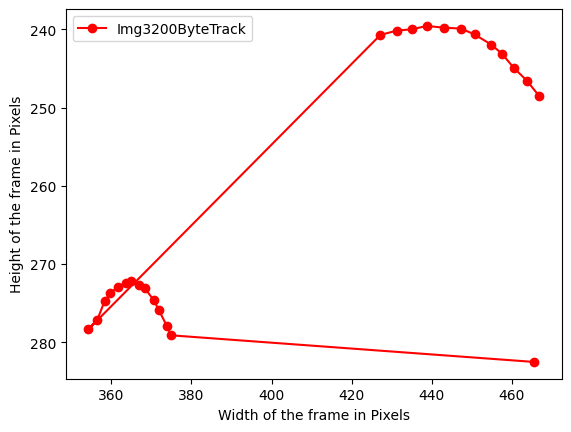

In [17]:
#now Bytetrack
df2 = pd.read_csv('img3200_bytetrack.csv')
df2['center_x'] = df2['x'] + df2['width']/2
df2['center_y'] = df2['y'] + df2['height']/2

#plot the center of the bounding box
from matplotlib import markers
plt.plot(df2['center_x'], df2['center_y'], marker='o', color='red', label='Img3200ByteTrack')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [25]:
x4 = df2['center_x']
y4 = df2['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates2 = list(zip(x4,y4))
    ground_coordinates2 = list(zip(x1,y1))
    count += 1

In [26]:
error3 = avg_displacement_error(predicted_coordinates2, ground_coordinates2)
error4 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates2)
print('ADE for ByteTrack (img3200) is:', error3, 'and AMD for ByteTrack (img3200) is:', error4)

ADE for ByteTrack (img3200) is: 146.38198777904657 and AMD for ByteTrack (img3200) is: 13.02948170501047


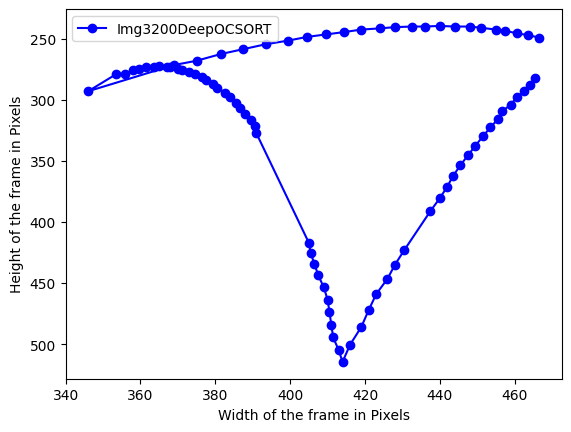

In [18]:
#now DeepOCSORT
df3 = pd.read_csv('img3200_deepocsort.csv')
df3['center_x'] = df3['x'] + df3['width']/2
df3['center_y'] = df3['y'] + df3['height']/2

#plot the center of the bounding box
from matplotlib import markers
plt.plot(df3['center_x'], df3['center_y'], marker='o', color='blue', label='Img3200DeepOCSORT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [27]:
x5 = df3['center_x']
y5 = df3['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates3 = list(zip(x5,y5))
    ground_coordinates3 = list(zip(x1,y1))
    count += 1

In [28]:
error5 = avg_displacement_error(predicted_coordinates3, ground_coordinates3)
error6 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates3)
print('ADE for DeepOCSORT (img3200) is:', error5, 'and AMD for DeepOCSORT (img3200) is:', error6)

ADE for DeepOCSORT (img3200) is: 31.21909836786292 and AMD for DeepOCSORT (img3200) is: 0.9193633679051698


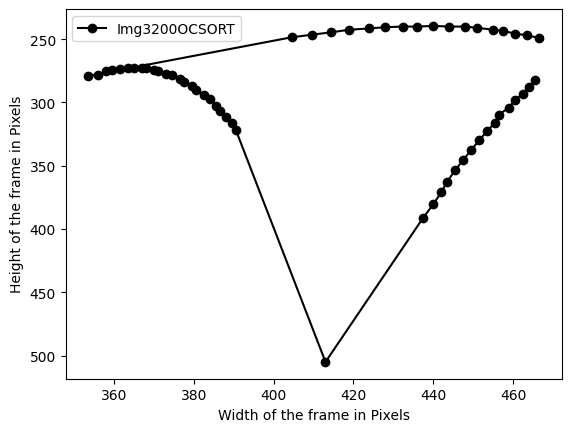

In [29]:
#now OCSORT
df4 = pd.read_csv('img3200_ocsort.csv')
df4['center_x'] = df4['x'] + df4['width']/2
df4['center_y'] = df4['y'] + df4['height']/2

#plot the center of the bounding box
from matplotlib import markers
plt.plot(df4['center_x'], df4['center_y'], marker='o', color='black', label='Img3200OCSORT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [30]:
x6 = df4['center_x']
y6 = df4['center_y']
count = 0
for i in range(len(x1)):
    predicted_coordinates4 = list(zip(x6,y6))
    ground_coordinates4 = list(zip(x1,y1))
    count += 1

In [31]:
error7 = avg_displacement_error(predicted_coordinates4, ground_coordinates4)
error8 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates4)
print('ADE for OCSORT (img3200) is:', error7, 'and AMD for OCSORT (img3200) is:', error8)

ADE for OCSORT (img3200) is: 93.48663285342985 and AMD for OCSORT (img3200) is: 2.540703256770226


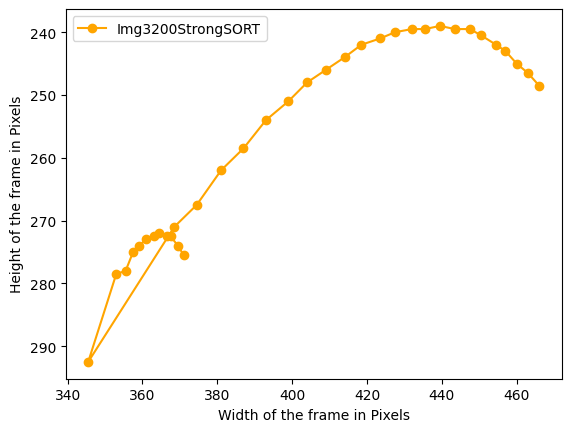

In [32]:
#now StrongSORT
df5 = pd.read_csv('img3200_strongsort.csv')
df5['center_x'] = df5['x'] + df5['width']/2
df5['center_y'] = df5['y'] + df5['height']/2

#Plot the center of the bounding box
from matplotlib import markers
plt.plot(df5['center_x'], df5['center_y'], marker='o', color='orange', label='Img3200StrongSORT')
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.xlabel('Width of the frame in Pixels')
plt.ylabel('Height of the frame in Pixels')
plt.legend()
plt.show()

In [33]:
x7 = df5['center_x']
y7 = df5['center_y']

count = 0
for i in range(len(x1)):
    predicted_coordinates5 = list(zip(x7,y7))
    ground_coordinates5 = list(zip(x1,y1))
    count += 1
error9 = avg_displacement_error(predicted_coordinates5, ground_coordinates5)
error10 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates5)
print('ADE for StrongSORT (img3200) is:', error9, 'and AMD for StrongSORT (img3200) is:', error10)

ADE for StrongSORT (img3200) is: 169.75580149252104 and AMD for StrongSORT (img3200) is: 23.902974759263163
